# STAT 201 Group Project

 ### Group 14 - Asteria Xu, Charles Deng, Jessie Sheng, Yaroslav Yaldin

<!-- ## **Predictive Analysis of Academic Performance Utilizing Study Habits and Prior Achievement Metrics** -->
## **A Decade-by-Decade Comparison of Movie Ratings**

In [1]:
# libraries needed in this proposal

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## **Introduction**

<!-- #### **Contextual Background and Relevance of the Topic** -->

For nearly a century, the cinema industry has been an important entertainment source. However, modern audiences are losing patience with films due to the abundance of short videos, finding monotonous plots tiresome. Writing a successful script is not solely about box office performance  but also about how the story is told (Jehoshua et al.). Producers should focus on creating compelling plots, as the plot structure and setting strongly influence the audience's viewing experience and movie rating (Xie, H et al.). 

<!-- #### **Primary Objectives and Research Questions of Our Project** -->
#### **Primary Objectives and Research Question**

People's tastes in films are constantly evolving, some claiming that current directors are incapable of producing quality films. In this case, our group aims to answer the following question: 

> 1. **Is the average audience rating of movies from 2001-2010 significantly greater than the average audience rating of movies from 2011-2020?**
> 
> 2. **Is the median audience rating of movies from 2001-2010 significantly different from the median audience rating of movies from 2011-2020?**


<!-- #### **Comprehensive Description and Justification of the Dataset Employed** -->
#### **Dataset Description**

We will examine the Kaggle “Movie Industry'' dataset, which consists of qualitative and quantitative variables such as movie name, genre, runtime, year, and IMDb rating from 1980 to 2020. We will focus on the scores of movies from 2001 to 2020 in our report.

#### **Response Variable**

The response variable is the difference in mean movie ratings between 2001-2010 and 2011-2020, with the standard deviation as the scale parameter. Both sample distributions are unimodal and close to a normal distribution, but slightly left-skewed. The large sample sizes $(n \approx 2000)$ allow us to apply the CLT.


## **Preliminary Results**

#### **Data Acquisition**

We commence our analysis fetching our study's CSV dataset from the project's remote repository. The ensuing code permits instantaneous import and examination of the data. A concise summary of the imported dataset is provided below:

In [2]:
# download data from our group's remote repository

url <- "https://raw.githubusercontent.com/yyaldin/stat201pr/main/movies.csv"

data <- read_csv(url)
cat("Table 1: Data summary")
data

Rows: 7668 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): name, rating, genre, released, director, writer, star, country, com...
dbl (6): year, score, votes, budget, gross, runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table 1: Data summary

name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.9e+07,46998772,Warner Bros.,146
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5e+06,58853106,Columbia Pictures,104
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.8e+07,538375067,Lucasfilm,124
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NA,Embi Productions,NA
It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",NA,NA,James Randall,James Randall,Christina Roz,United States,15000,NA,NA,120
Tee em el,NA,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NA,NA,PK 65 Films,102


#### **Initial Data Summary (Exploratory Data Analysis)**

We divide the data into two time-period subsets (2001-2010 and 2011-2020), cleanse missing 'score' values, and trim unrequired columns to retain only 'name', 'year', and 'score'.

In [3]:
# Subset the data for the two periods
data_2001_2010 <- filter(data, year >= 2001 & year <= 2010)%>%
    filter(!is.na(score))%>%
    select(name, year, score)
data_2011_2020 <- filter(data, year >= 2011 & year <= 2020)%>%
    filter(!is.na(score))%>%
    select(name, year, score)
tidy_combined_data <- data %>%
  filter(year >= 2001 & year <= 2020 & !is.na(score)) %>%
  mutate(decade = ifelse(year <= 2010, "2001-2010", "2011-2020")) %>%
  select(name, year, score, decade)
cat("Table 2: Tidy Data Summary (2001 - 2010 years)")
data_2001_2010
cat("Table 3: Tidy Data Summary (2011 - 2020 years)")
data_2011_2020
cat("Table 4: Tidy Data Summary Combined (2011 - 2020 & 2011 - 2020 years)")
tidy_combined_data

Table 2: Tidy Data Summary (2001 - 2010 years)

name,year,score
<chr>,<dbl>,<dbl>
Harry Potter and the Sorcerer's Stone,2001,7.6
The Fast and the Furious,2001,6.8
The Lord of the Rings: The Fellowship of the Ring,2001,8.8
⋮,⋮,⋮
Passion Play,2010,4.6
Kaboom,2010,5.7
Everything Must Go,2010,6.4


Table 3: Tidy Data Summary (2011 - 2020 years)

name,year,score
<chr>,<dbl>,<dbl>
Captain America: the First Avenger,2011,6.9
Thor,2011,7.0
Harry Potter and the Deathly Hallows: Part 2,2011,8.1
⋮,⋮,⋮
Dream Round,2020,4.7
Saving Mbango,2020,5.7
Tee em el,2020,5.7


Table 4: Tidy Data Summary Combined (2011 - 2020 & 2011 - 2020 years)

name,year,score,decade
<chr>,<dbl>,<dbl>,<chr>
Harry Potter and the Sorcerer's Stone,2001,7.6,2001-2010
The Fast and the Furious,2001,6.8,2001-2010
The Lord of the Rings: The Fellowship of the Ring,2001,8.8,2001-2010
⋮,⋮,⋮,⋮
Dream Round,2020,4.7,2011-2020
Saving Mbango,2020,5.7,2011-2020
Tee em el,2020,5.7,2011-2020


From the cleaned data subsets, we calculate mean, median, standard deviation, variance, and 'score' counts. The results are stored in respective 'summary_2001_2010' and 'summary_2011_2020' data frames.

In [4]:
# Compute parameters
summary_2001_2010 <- data_2001_2010 %>%
  summarise(sample_mean = mean(score, na.rm = TRUE),
            sample_median = median(score, na.rm = TRUE),
            sample_sd = sd(score, na.rm = TRUE),
            sample_var = var(score, na.rm = TRUE),
            n = n())

summary_2011_2020 <- data_2011_2020 %>%
  summarise(sample_mean = mean(score, na.rm = TRUE),
            sample_median = median(score, na.rm = TRUE),
            sample_sd = sd(score, na.rm = TRUE),
            sample_var = var(score, na.rm = TRUE),
            n = n())

# Combine both summaries into one data frame
# Reference: https://www.digitalocean.com/community/tutorials/rbind-function-r
parameters <- rbind(cbind(Period = "2001-2010", summary_2001_2010), 
                    cbind(Period = "2011-2020", summary_2011_2020))

cat("Table 5: Descriptive Statistics")
parameters

Table 5: Descriptive Statistics

Period,sample_mean,sample_median,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2001-2010,6.425050,6.5,1.0069680,1.0139845,2000
2011-2020,6.517179,6.6,0.8853659,0.7838728,1822


Table 4 shows movie rating statistics for 2001-2010 and 2011-2020. The average scores increased slightly from 6.43 to 6.52, and the standard deviation decreased from 1.01 to 0.89, indicating a minor overall improvement and less score variability over time.

In [5]:
# Compute difference of means
diff_mean <- summary_2001_2010$sample_mean - summary_2011_2020$sample_mean 
# Compute standard error for the difference of means
SE_diff <- sqrt((summary_2001_2010$sample_sd^2 / summary_2001_2010$n) +
                (summary_2011_2020$sample_sd^2 / summary_2011_2020$n))
# Compute degrees of freedom
df <- summary_2001_2010$n + summary_2011_2020$n - 2
# Compute the degrees of freedom using the Welch-Satterthwaite equation
df_welch <- (
    (summary_2001_2010$sample_sd^2 / summary_2001_2010$n + summary_2011_2020$sample_sd^2 / summary_2011_2020$n)^2
) / (
    (summary_2001_2010$sample_sd^4 / (summary_2001_2010$n^2 * (summary_2001_2010$n - 1))) +
    (summary_2011_2020$sample_sd^4 / (summary_2011_2020$n^2 * (summary_2011_2020$n - 1)))
)
# Storing computation in the tibble
summary_stats <- tibble(
  n_sample_01_10 = summary_2001_2010$n,
  mean_sample_01_10 = summary_2001_2010$sample_mean,
  n_sample_11_20 = summary_2011_2020$n,
  mean_sample_11_20 = summary_2011_2020$sample_mean,
  diff_in_means = diff_mean,
  std_error = SE_diff,
  df = df,
  df_welch = df_welch
)
cat("Table 6: Descriptive Statistics for Differences in Mean Movie Scores between 2001-2010 and 2011-2020\n")
summary_stats

Table 6: Descriptive Statistics for Differences in Mean Movie Scores between 2001-2010 and 2011-2020


n_sample_01_10,mean_sample_01_10,n_sample_11_20,mean_sample_11_20,diff_in_means,std_error,df,df_welch
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,6.42505,1822,6.517179,-0.09212892,0.03061403,3820,3815.233


The calculated statistics reveal a slight increase in movie ratings from 2001-2010 (mean: 6.43, n: 2000) to 2011-2020 (mean: 6.52, n: 1822), with a mean difference of 0.09 and a standard error of 0.03. Degrees of freedom were approximated to around 3820.

#### **Data Visualization**

These visuals examine movie ratings for 2001-2010 and 2011-2020 using histograms, a box plot, and density plots. They highlight distribution patterns and central tendencies across periods, enabling a detailed comparative analysis of statistical attributes.

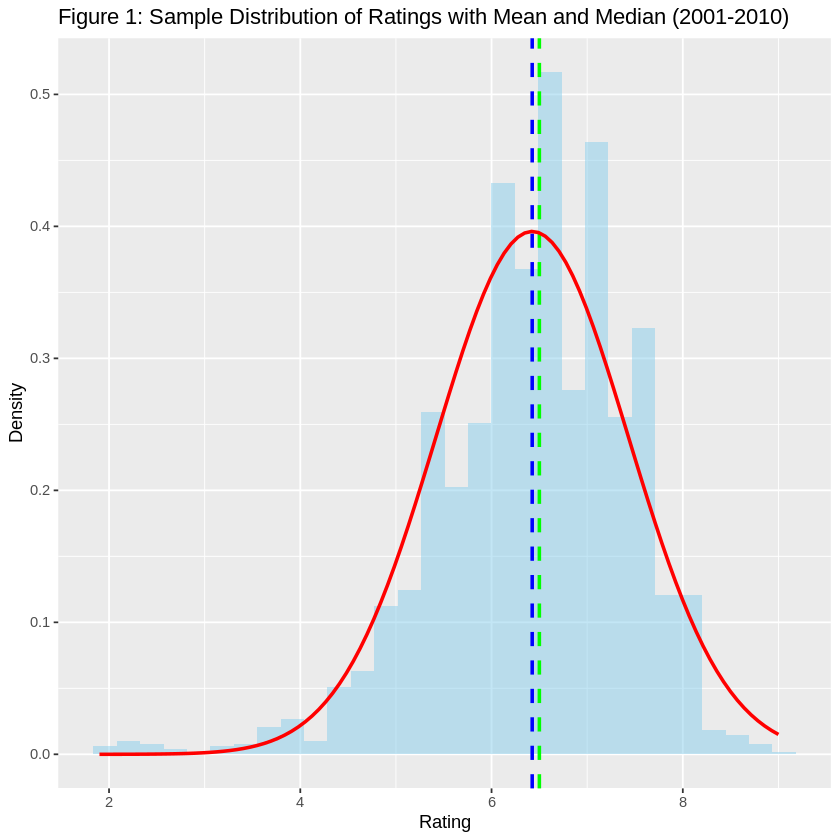

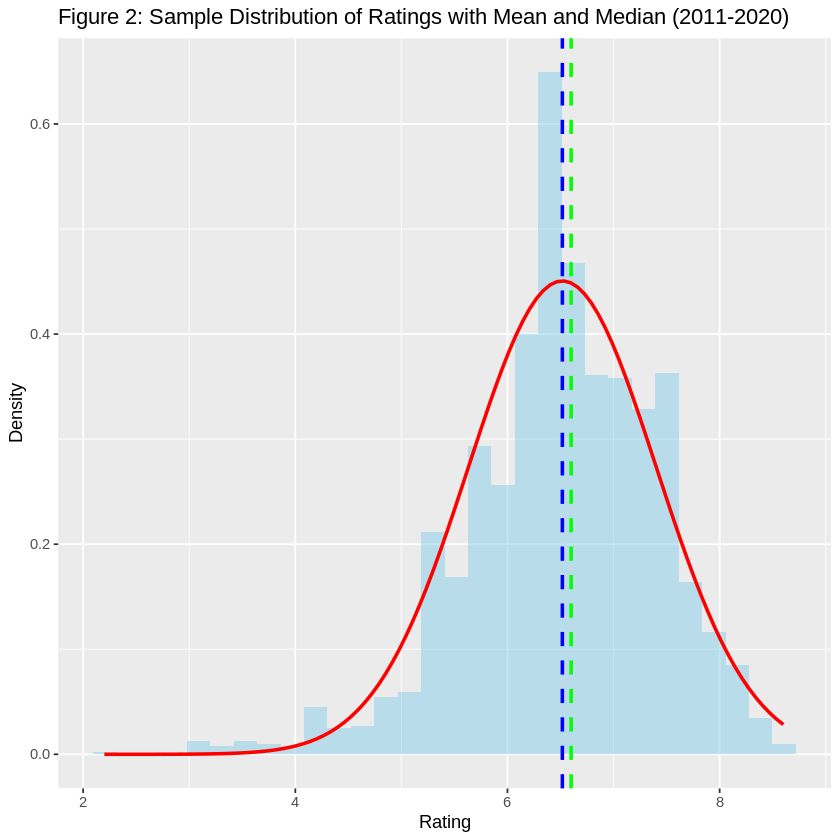

In [6]:
# Calculate x and y coordinates for the normal curve
x <- seq(min(data_2001_2010$score, na.rm = TRUE), max(data_2001_2010$score, na.rm = TRUE), length.out = 100)
y <- dnorm(x, mean = mean(data_2001_2010$score, na.rm = TRUE), sd = sd(data_2001_2010$score, na.rm = TRUE))
df_norm_2001_2010 <- data.frame(x = x, y = y)

x <- seq(min(data_2011_2020$score, na.rm = TRUE), max(data_2011_2020$score, na.rm = TRUE), length.out = 100)
y <- dnorm(x, mean = mean(data_2011_2020$score, na.rm = TRUE), sd = sd(data_2011_2020$score, na.rm = TRUE))
df_norm_2011_2020 <- data.frame(x = x, y = y)
# For 2001-2010 data:

# Compute median
median_2001_2010 <- median(data_2001_2010$score, na.rm = TRUE)

# Plot histogram with normal distribution curve and median
ggplot(data_2001_2010, aes(x = score)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(score, na.rm = TRUE)), color = "blue", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median_2001_2010), color = "green", linetype = "dashed", size = 1) + # Median line
  geom_line(data = df_norm_2001_2010, aes(x = x, y = y), colour = "red", size = 1) +
  ggtitle("Figure 1: Sample Distribution of Ratings with Mean and Median (2001-2010)") +
  xlab("Rating") +
  ylab("Density")

# For 2011-2020 data:

# Compute median
median_2011_2020 <- median(data_2011_2020$score, na.rm = TRUE)

# Plot histogram with normal distribution curve and median
ggplot(data_2011_2020, aes(x = score)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(score, na.rm = TRUE)), color = "blue", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median_2011_2020), color = "green", linetype = "dashed", size = 1) + # Median line
  geom_line(data = df_norm_2011_2020, aes(x = x, y = y), colour = "red", size = 1) +
  ggtitle("Figure 2: Sample Distribution of Ratings with Mean and Median (2011-2020)") +
  xlab("Rating") +
  ylab("Density")

Figures 1 and 2 display normally-distributed, slightly left-skewed histograms of movie ratings for 2001-2010 and 2011-2020. The mean is represented by the blue line, while the red curve indicates ideal normality, validating the use of inferential statistics. The large sample size (~2000) supports the Central Limit Theorem (CLT) application and minimizes skewness concerns.

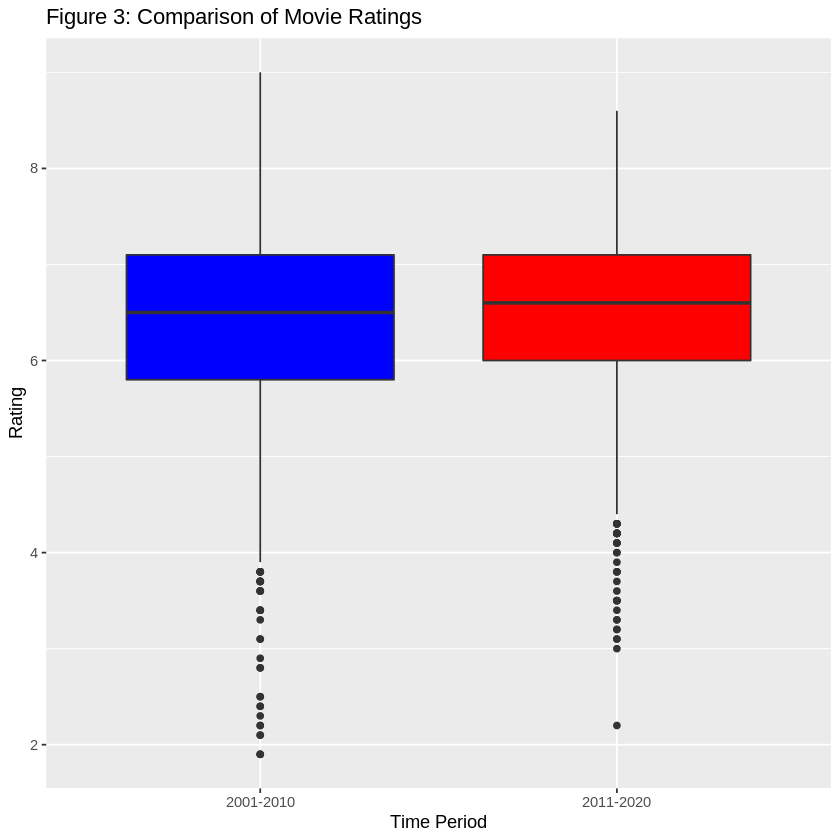

In [7]:
ggplot() +
  geom_boxplot(data = data_2001_2010, aes(x = "2001-2010", y = score), fill = "blue") +
  geom_boxplot(data = data_2011_2020, aes(x = "2011-2020", y = score), fill = "red") +
  xlab("Time Period") +
  ylab("Rating") +
  ggtitle("Figure 3: Comparison of Movie Ratings")


Figure 3's box plots compare movie ratings from 2001-2010 and 2011-2020, showing similar IQR and median values, implying minor shifts in central tendency and dispersion. Lower-rating outliers exist in both periods.

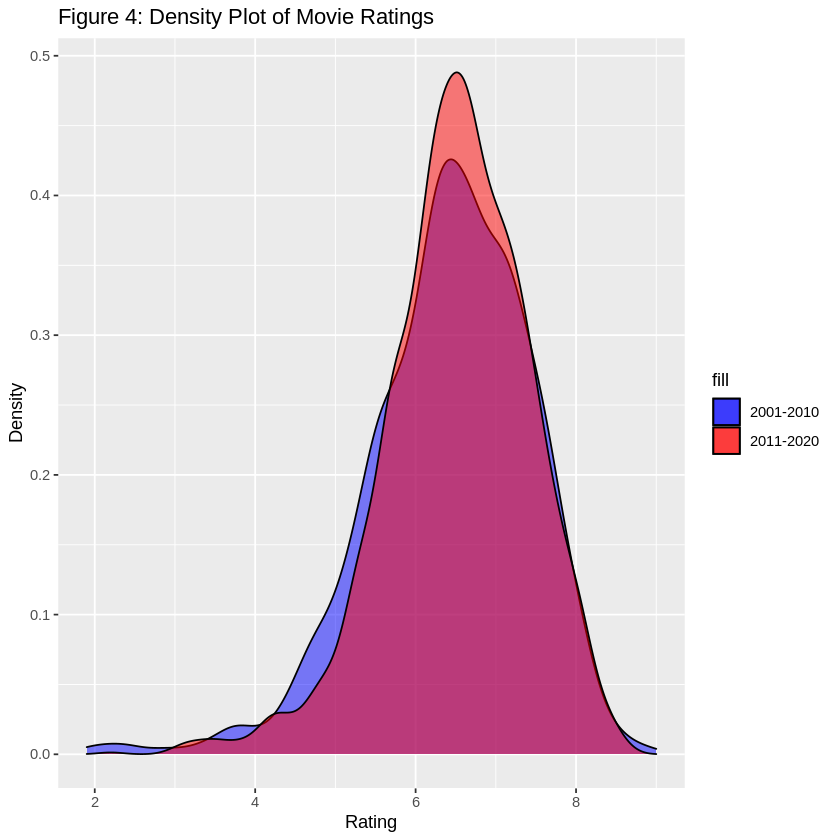

In [8]:
ggplot() +
  geom_density(data = data_2001_2010, aes(x = score, fill = "2001-2010"), alpha = 0.5) +
  geom_density(data = data_2011_2020, aes(x = score, fill = "2011-2020"), alpha = 0.5) +
  xlab("Rating") +
  ylab("Density") +
  ggtitle("Figure 4: Density Plot of Movie Ratings") +
  scale_fill_manual(values = c("blue", "red"))

Figure 4's overlaid density plots compare movie ratings from 2001-2010 to 2011-2020. While there's a significant overlap, the earlier decade shows broader distribution, suggesting varied ratings, and the latter has a pronounced peak, indicating ratings centered around the mean. This highlights subtle changes in rating distributions over time.

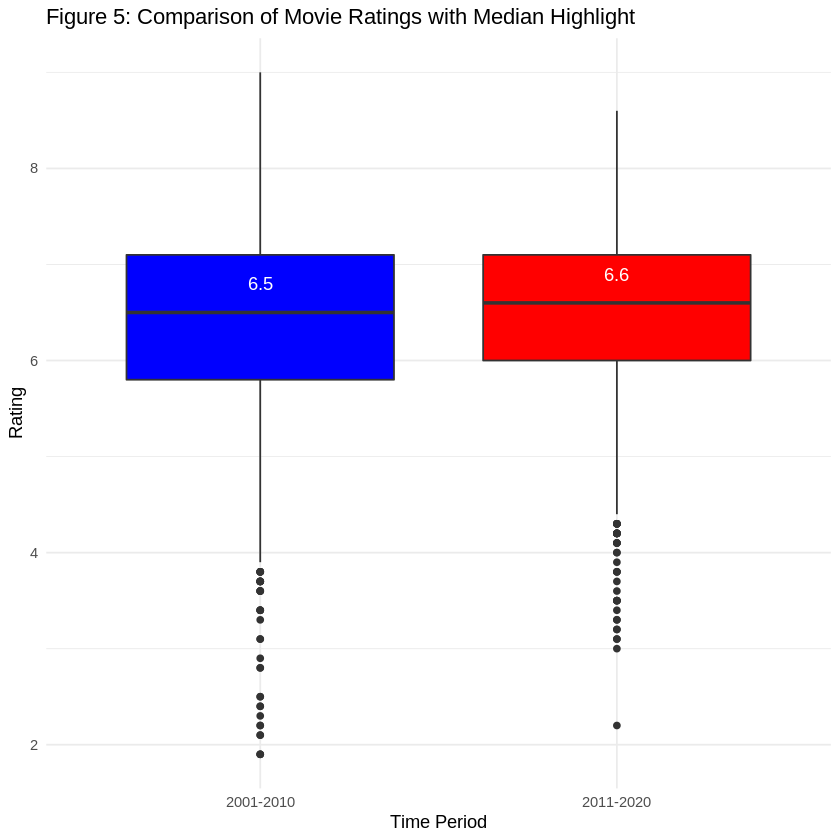

In [9]:
median_2001_2010 <- median(data_2001_2010$score)
median_2011_2020 <- median(data_2011_2020$score)

ggplot() +
  geom_boxplot(data = data_2001_2010, aes(x = "2001-2010", y = score), fill = "blue") +
  geom_boxplot(data = data_2011_2020, aes(x = "2011-2020", y = score), fill = "red") +
  geom_text(aes(x = "2001-2010", y = median_2001_2010 + 0.3, label = round(median_2001_2010, 2)), color = "white") +
  geom_text(aes(x = "2011-2020", y = median_2011_2020 + 0.3, label = round(median_2011_2020, 2)), color = "white") +
  xlab("Time Period") +
  ylab("Rating") +
  ggtitle("Figure 5: Comparison of Movie Ratings with Median Highlight") +
  theme_minimal()

## **Methods**

### **Plan:**

<!-- #### **Data Analysis Plan and Chosen Variables** -->

We are using IMDb's movie ratings dataset from Kaggle, which offers consistent, unbiased ratings and up-to-date data, providing a reliable indicator of the general public’s opinion. Its large sample size also ensures reliability and generalizability and can represent the true population.. 

While preliminary analysis and plots provide distribution and point estimates for the parameter of interest, they are insufficient for decision-making. We need hypothesis testing and confidence intervals for further statistical evidence to provide stakeholders.

#### **Hypothesis Testing**

We will conduct the **first hypothesis test** for the difference in means with the asymptotic method using a 5% significance level as it is the most commonly used value in many fields (Salkind et al.), analyze the confidence interval of the difference at a 95% confidence level, and utilize the `t.test` function to validate our calculations. We will perform a two-sample t-test with the following hypotheses:

Let $\mu_1$ be the average IMDb rating for movies between 2001 and 2010.

Let $\mu_2$ be the average IMDb rating for movies between 2011 and 2020.

$H_0: \mu_1- \mu_2 = 0$ 

$H_1: \mu_1- \mu_2 > 0$ 

We will compare means of two independent populations using the t-distribution since we only have access to sample data.

Hence we have,

Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

<br />

We will conduct the **second hypothesis test** by using the permutation method to create a null distribution, maintaining a 5% significance level. We will then calculate the p-value associated with our observed difference in medians. If the p-value is less than or equal to 0.05, we will reject the hypothesis. In addition, we will also create a 95% confidence interval for the difference in medians with the `infer` package using bootstrapping to observe whether the value 0 is captured, and further strengthen the results of our analysis. The following hypotheses will be tested:

Let $m_1$ be the median IMDb rating for movies between 2001 and 2010.

Let $m_2$ be the median IMDb rating for movies between 2011 and 2020.

$H_0: m_1-m_2=0$

$H_1: m_1-m_2 \neq 0$

In summary, we will use the asymptotic method for the hypothesis test regarding average audience rating and the permutation method with the `infer` package for the hypothesis test regarding median audience rating. Both methods align with our research objectives and will help us draw conclusions about the differences between the time periods in terms of movie quality.

<!-- 
#### **Visualization of Results** -->

### **Results:**

**Hypothesis Test with Asymptotic Method: Mean Movie Rating**

For the first hypothesis test, we will be using the t-distribution since the population standard deviation  is unknown, and a 5% significance level. The samples are large $(n \approx 2000)$ and less than 10% of the population, selected independently of each other, and all observations are independent, which satisfies the conditions to allow us to perform the two-sample t-test.

> Since all the requirements are met and our large sample size is significantly greater than the general threshold $(n > 30)$, both asymptotic and bootstrapping methods are appropriate and we believe they would produce similar results, with a slight deviation. Each method has its pros and cons, but because all conditions are satisfied, the asymptotic method may be more efficient and bootstrapping may be more computationally intensive. 

We begin by calculating the test statistic.


In [10]:
# 1. Compute the t-statistic
t_statistic <- diff_mean / SE_diff
cat("T-statistic:", t_statistic, "\n")

T-statistic: -3.009369 


With the obtained test statistic, we calculate the p-value for our one-tailed test. The degrees of freedom used is based on the Welch-Satterthwaite equation.

In [11]:
# 2. Get the p-value for the t-statistic
# We're using a one-tailed test
p_value <- 1 - pt(t_statistic, df_welch)
cat("P-value:", p_value, "\n")

P-value: 0.9986825 


Now we calculate the 95% confidence interval using the `qt` function and $\alpha =0.05$.

In [12]:
# 3. Compute the 95% confidence interval
alpha <- 0.05
t_critical <- qt(1 - alpha, df_welch)
margin_of_error <- t_critical * SE_diff
conf_interval <- c(diff_mean - margin_of_error, diff_mean + margin_of_error)
cat("95% Confidence Interval for Difference of Means:", conf_interval, "\n\n")

95% Confidence Interval for Difference of Means: -0.1424968 -0.0417611 



This confidence interval tells us that we are 95% confident that the true difference in average movie ratings $(\mu_1-\mu_2)$ is captured by the interval $[-0.1424968, -0.0417611]$.

To verify our calculations with unequal variances, we use the `t.test` function. 

In [13]:
# 4. Using t.test() to verify calculations with unequal variances
test_result <- tidy(
    t.test(data_2001_2010$score, 
                      data_2011_2020$score,
                      alternative = "greater",
                      mu = 0,
                      var.equal = FALSE)) # Assuming unequal variance
# Print results
cat("Table 7: Results of Welch's Two-Sample t-test Comparing Mean Movie Scores from 2001-2010 to 2011-2020\n")
print(test_result)

Table 7: Results of Welch's Two-Sample t-test Comparing Mean Movie Scores from 2001-2010 to 2011-2020
# A tibble: 1 × 10
  estim…¹ estim…² estim…³ stati…⁴ p.value param…⁵ conf.…⁶ conf.…⁷ method alter…⁸
    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl> <chr>  <chr>  
1 -0.0921    6.43    6.52   -3.01   0.999   3815.  -0.142     Inf Welch… greater
# … with abbreviated variable names ¹​estimate, ²​estimate1, ³​estimate2,
#   ⁴​statistic, ⁵​parameter, ⁶​conf.low, ⁷​conf.high, ⁸​alternative


<br />
Both methods result in a test statistic of -3.01 and a p-value of 0.999, which makes us more certain of our calculations. 

Based on our p-value of 0.999 and 5% significance level, we do not have enough evidence to reject the null hypothesis. We conclude that there is insufficient evidence to support that movies released between 2001 and 2010 have a higher average rating than movies between 2011 and 2020. 

Furthermore, it is worth noting that the 95% confidence interval $[-0.1424968, -0.0417611]$ falls in the negative range and does not contain values greater than zero. This matches with our hypothesis test result of failing to reject the null hypothesis. 

<br />

**Hypothesis Test with Permutation Method and Bootstrapping: Median Movie Rating**

For the second hypothesis test, we will be using the infer workflow to create the null distribution, calculate the p-value, and analyze it at a 5% significance level. In addition, the infer workflow will also be used to create a 95% confidence level for the difference of medians through bootstrapping for further comparison. 

> The CLT is not applicable to medians, so we choose to use permutations instead. The permutation method has fewer restrictions compared to theory-based approaches; it does not require the normality assumption, large sample sizes, or whether formulas for sample statistics exist. If we had applied the asymptotic method here, the results may be inaccurate.

The observed difference in medians:

In [14]:
d_median_hat <- median(data_2011_2020$score) - median(data_2001_2010$score)
d_median_hat

[1] 0.1

We begin by generating 2000 samples from the null distribution by resampling through shuffles/permutations. We visualize the null distribution for the difference of medians by plotting a histogram, shown in Figure 6 below.

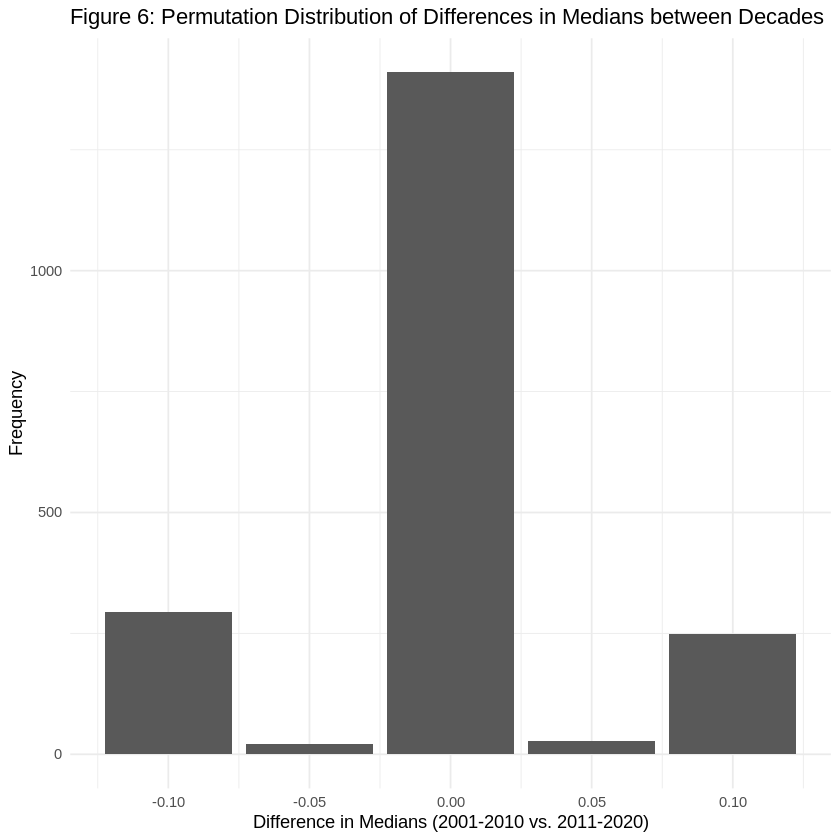

In [15]:
set.seed(2023)  # Setting seed for reproducibility
null_distn_medians <- tidy_combined_data %>%
  specify(formula = score ~ decade) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 2000, type = "permute") %>%
  calculate(stat = "diff in medians", order = c("2001-2010", "2011-2020"))

null_distn_medians %>% 
  visualize() +
  ggtitle("Figure 6: Permutation Distribution of Differences in Medians between Decades") +
  xlab("Difference in Medians (2001-2010 vs. 2011-2020)") +
  ylab("Frequency") +
  theme_minimal()

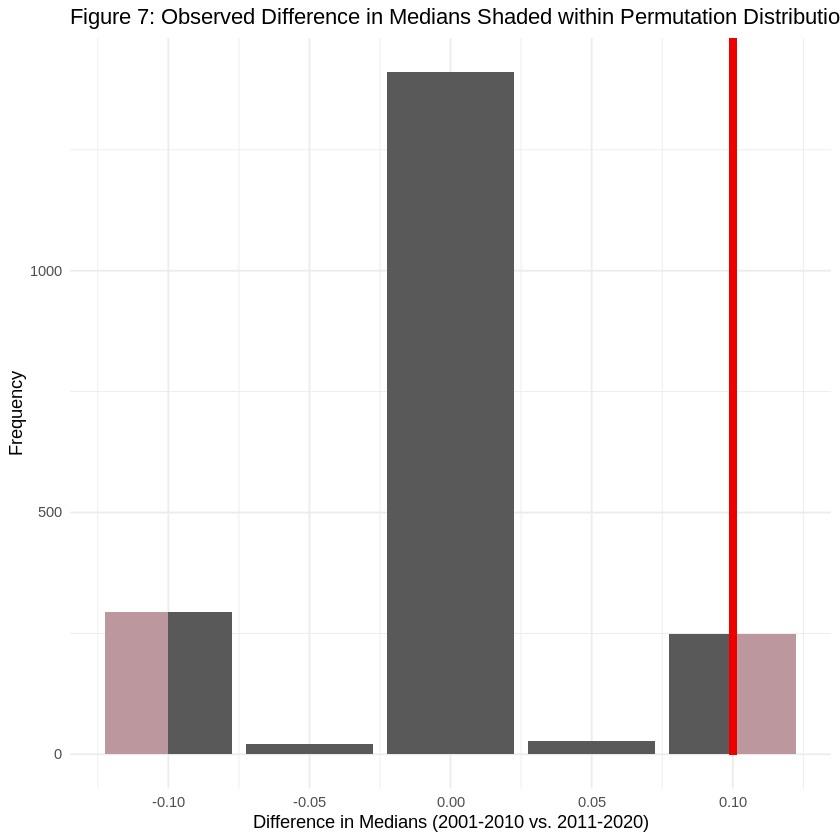

In [16]:
null_distn_medians %>%
  visualize() +
  shade_p_value(obs_stat = d_median_hat, direction = "both") +
  ggtitle("Figure 7: Observed Difference in Medians Shaded within Permutation Distribution") +
  xlab("Difference in Medians (2001-2010 vs. 2011-2020)") +
  ylab("Frequency") +
  theme_minimal()

Figure 7 includes the shaded critical region corresponding to our observed sample difference in medians (calculated and stored above in the variable `d_median_hat`). As we are performing a two-tailed test, the direction is set to “both”.

We now calculate the p-value using our observed sample statistic and null distribution. 

In [17]:
p_value_median <- null_distn_medians %>%
  get_pvalue(obs_stat = d_median_hat, direction = "both")
cat("Table 8: P-value from Permutation Test Comparing Median Movie Scores between 2001-2010 and 2011-2020\n")
p_value_median

Table 8: P-value from Permutation Test Comparing Median Movie Scores between 2001-2010 and 2011-2020


p_value
<dbl>
0.248


Based on our p-value of 0.238 and 5% significance level, we do not have enough evidence to reject the null hypothesis. We conclude that there is insufficient evidence to suggest that movies released between 2001 and 2010 have a different average rating from movies between 2011 and 2020.  

Additionally, we use the infer workflow to generate a bootstrap sampling distribution with 2000 resamples.

In [18]:
set.seed(2023)
boot_distn_medians <- tidy_combined_data %>%
  specify(formula = score ~ decade) %>%
  generate(reps = 2000, type = "bootstrap") %>%
  calculate(stat = "diff in medians", order = c("2001-2010", "2011-2020"))

A 95% confidence interval for the difference in median move scores between 2001-2010 and 2011-2020 is calculated using the bootstrap resampling. This interval is visualized by the shaded region on our histogram for the sampling distribution. 

Table 9: 95% Confidence Interval for Difference in Median Movie Scores between 2001-2010 and 2011-2020 Using Bootstrap Resampling


lower_ci,upper_ci
<dbl>,<dbl>
-0.2,0


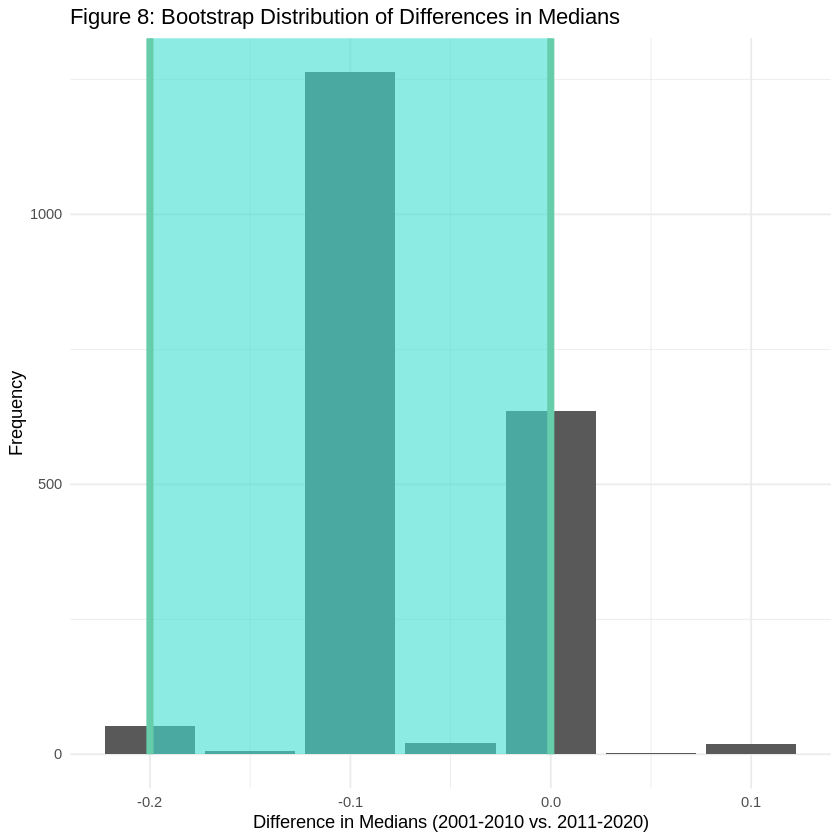

In [19]:
ci_medians <- boot_distn_medians %>%
  get_ci()
cat("Table 9: 95% Confidence Interval for Difference in Median Movie Scores between 2001-2010 and 2011-2020 Using Bootstrap Resampling\n")
ci_medians

boot_distn_medians %>%
  visualize() +
  shade_ci(endpoints = ci_medians) +
  ggtitle("Figure 8: Bootstrap Distribution of Differences in Medians") +
  xlab("Difference in Medians (2001-2010 vs. 2011-2020)") +
  ylab("Frequency") +
  theme_minimal()

This confidence interval tells us that we are 95% confident that the true difference in mean movie ratings $(m_1-m_2)$ is captured by the interval [$-0.2, 0]$.

A key value that is included in the confidence interval is the value, or difference of, 0. This aligns with the result of our hypothesis test and conclusion that there is no significant difference between the median move rating of the two decades.

## **Discussion**

#### **Summary of Findings**

Through our hypothesis test for the difference in mean movie ratings, we calculated a test statistic of -3.01 and a p-value of 0.999 using both the `qt` and `t.test` functions. The 95% confidence interval computed for the difference of means is $[-0.1424968, -0.0417611]$. With our chosen 5% significance level, we fail to reject the null hypothesis.

Our hypothesis test for the difference in median movie rating was carried out using the bootstrapping method with the infer workflow. The resulting p-value is calculated to be 0.238, and the 95% confidence interval for the difference in medians is $[-0.2, 0]$. Given our selected 5% significance level, we fail to reject the null hypothesis.

#### **Expectation vs. Results**

For our first hypothesis test, we aim to test the hypothesis concerning the mean IMDb movie rating to determine whether there is a significant difference in the average quality of films produced between the two decades. Based on our research and prior to conducting any statistical analysis on the dataset, we expected that 2001-2010 movies do not have a significantly greater mean rating than 2011-2020 movies.

However, the results of our hypothesis test using the asymptotic method indicate that the average rating of movies from 2010-2010 is not significantly greater than the average rating of movies from 2011-2020.  

An observation we noted is that the 95% confidence interval for the difference in means lies entirely below 0, and at the same time, the test statistic is a negative value. This suggests that the difference between the average movie ratings is actually less than 0. In other words, the average IMDb rating of movies from 2001-2010 is less than the average IMDb rating of movies from 2011-2020, differing from the alternative hypothesis we initially set up based on our preliminary research. 

For our second hypothesis test regarding the difference in median IMDb movie ratings, our objective is to examine the hypothesis related to the median IMDb movie ratings to determine whether there is a statistically significant difference in the median quality of films produced between these two decades. Based on our research, we expected that the median audience rating of 2001-2010 movies would be significantly different from that of 2011-2020 movies (with the former decade having a higher median rating). 

In contrast, the results of our hypothesis test using the bootstrapping method and confidence interval for the difference in medians indicate that there is no statistically significant difference in the median movie ratings between the two decades. 

The median is less likely to be affected by the extreme values (outliers). In the earlier decade (2001-2010), the density plot shows a wider distribution of ratings. This suggests that films from this period received more varied ratings, with some films rated highly and others less so. In contrast, the density plot for the latter decade (2011-2020) shows a more pronounced peak, suggesting that a significant number of films received ratings centered on the mean or average. This implies a convergence in the level of film ratings during this period. In addition, the boxplot shows similar IQR and median values, with 0.1 for the movies from 2001-2010 and 0.0 for the movies from 2011-2020, indicating slight changes in both the central tendency and dispersion, which does not contrast with the alternative hypothesis that we originally formulated according to our preliminary research findings.


#### **Impact**

By gaining a more comprehensive insight of how films have evolved over time, it can reveal shifts in audience ratings, which may help filmmakers make informed decisions that better equip the industry to adapt to changing trends and ensure the continued production of high-quality films. Furthermore, understanding how certain genres or themes have historically performed can also help studios mitigate risks associated with investments.

#### **Future Questions and Research**

The study could inspire future research in the movie industry, exploring other factors influencing movie quality in each decade. Movies often reflect and comment on real-world concerns, like climate change, diversity and inclusion, political movements and technological advancements. Recognizing these connections can provide insights into the themes and narratives that resonate with audiences. Additionally, different movies might excel at the box office while others gain critical acclaim. Understanding the interplay between commercial success and artist merit might also be a direction that could be studied in the future.

## **References**



Grijalva, D. (2021, July 23). Movie Industry. Kaggle. https://www.kaggle.com/datasets/danielgrijalvas/movies 

Jehoshua Eliashberg, Sam K. Hui, Z. John Zhang, (2007) From Story Line to Box Office: A New Approach for Green-Lighting Movie Scripts. Management Science 53(6):881-893. https://doi.org/10.1287/mnsc.1060.0668

Salkind, N. J., Gale Virtual Reference Library EBook Collection, & Thomson Gale (Firm). (2007). In Neil Salkind, Salkind N. J.(Eds.), Encyclopedia of measurement and statistics. SAGE Publications. https://doi.org/10.4135/9781412952644

Xie, H., Wang, H., Zhao, C., Wang, Z. (2019). Movie Score Prediction Model Based on Movie Plots. In: Mao, R., Wang, H., Xie, X., Lu, Z. (eds) Data Science. ICPCSEE 2019. Communications in Computer and Information Science, vol 1059. Springer, Singapore. https://doi.org/10.1007/978-981-15-0121-0_49
